### matplotlib 차트 유형

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib

font_path = 'C:/Windows/Fonts/gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)

### Histogram

- 연속형 값을 일정 구간을 나누어 구간별 데이터포인트의 빈도를 시각화
    - x축 : 연속형 데이터
    - y축 : 구간별 데이터 포인트의 개수 (합)

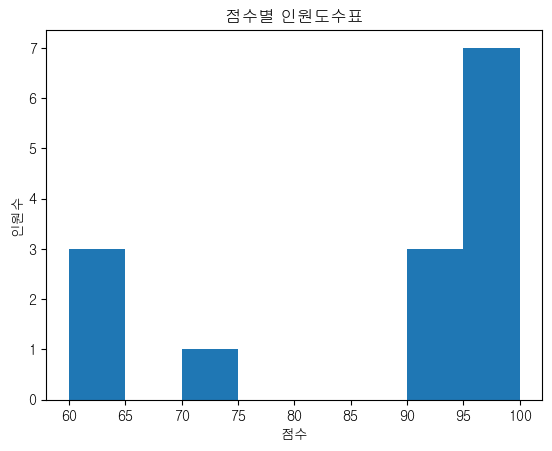

In [3]:
scores = [100, 95, 97, 94, 92, 95, 95, 95, 92, 54, 53, 54, 64, 62, 100, 23, 45, 64, 74]

bins = [60, 65, 70, 75, 80, 85, 90, 95, 100]
plt.hist(scores, bins=bins)

plt.xlabel('점수')
plt.ylabel('인원수')
plt.title('점수별 인원도수표')
plt.show()

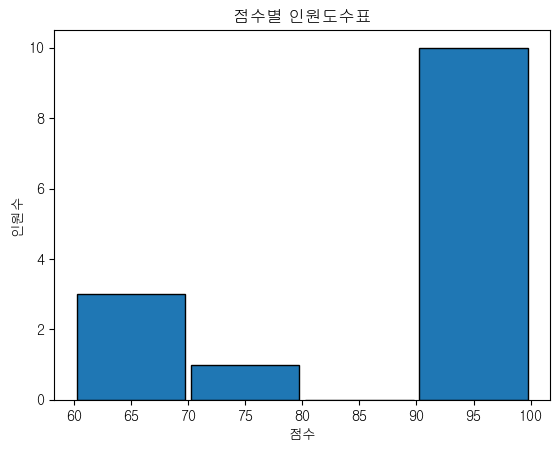

In [8]:
scores = [100, 95, 97, 94, 92, 95, 95, 95, 92, 54, 53, 54, 64, 62, 100, 23, 45, 64, 74]

bins = [60, 70, 80, 90, 100]
plt.hist(scores, bins=bins, edgecolor='black', rwidth=0.95)
# bins : 나뉠 구간의 갯수 (기본값 = 10)
# edgecolor : 히스토그램 막대의 경계선 색상
# rwidth : 0 ~ 1 사이의 값으로 상대적 너비 조정

plt.xlabel('점수')
plt.ylabel('인원수')
plt.title('점수별 인원도수표')
plt.show()

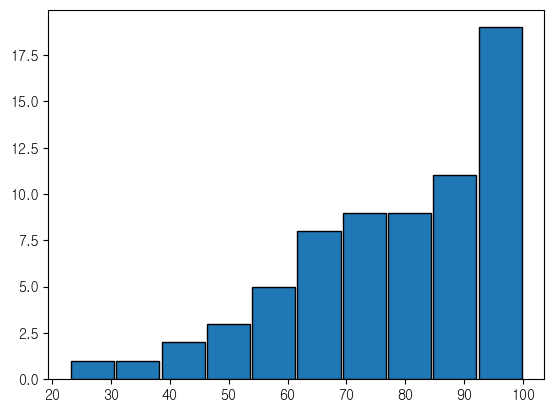

In [10]:
plt.hist(scores, edgecolor='black', rwidth=0.95, cumulative=True)
# cumulative : 누적 값
plt.show()


In [15]:
# 암호화폐 일일 수익률
df = pd.read_csv('./data/crypto_daily_returns.csv')
df

,Date,BTC,ETH,LTC
0,9/17/2014,0.000000,0.000000,0.000000
1,9/18/2014,-7.192558,NaN,-7.379983
2,9/19/2014,-6.984264,NaN,-7.629499
3,9/20/2014,3.573492,NaN,-0.955003
4,9/21/2014,-2.465854,NaN,-0.945300
...,...,...,...,...
2380,3/28/2021,-0.040672,-1.464535,0.107149
2381,3/29/2021,3.216138,7.587343,5.105316
2382,3/30/2021,2.021625,1.447984,1.135017
2383,3/31/2021,0.001936,3.918042,0.415392


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2385 entries, 0 to 2384
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2385 non-null   object 
 1   BTC     2385 non-null   float64
 2   ETH     2061 non-null   float64
 3   LTC     2385 non-null   float64
dtypes: float64(3), object(1)
memory usage: 74.7+ KB


In [14]:
df.describe()

,BTC,ETH,LTC
count,2385.000000,2061.000000,2385.000000
mean,0.280359,0.538739,0.315764
std,3.887338,6.471972,5.783455
min,-37.169539,-72.824950,-40.224814
25%,-1.209796,-2.257161,-1.922825
50%,0.203326,0.043409,-0.022066
75%,1.804233,2.912284,2.078286
max,25.247169,50.732307,66.765321


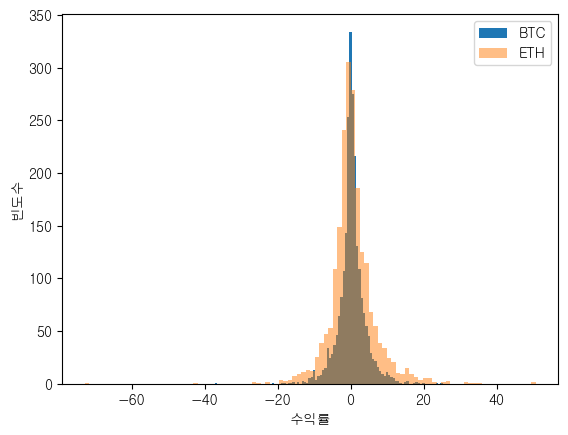

In [17]:
plt.hist(df['BTC'], bins=100, label='BTC')
plt.hist(df['ETH'], bins=100, label='ETH', alpha=0.5)
plt.legend()

plt.xlabel('수익률')
plt.ylabel("빈도수")
plt.show()


##### Bar Plot

- 막대 차트
- 범주형 데이터와 연속형 데이터(막대의 길이)의 관계를 시각화
    - x축 : 범주형 데이터 카테고리
    - y축 : 연속형 데이터 (총합, 평균)

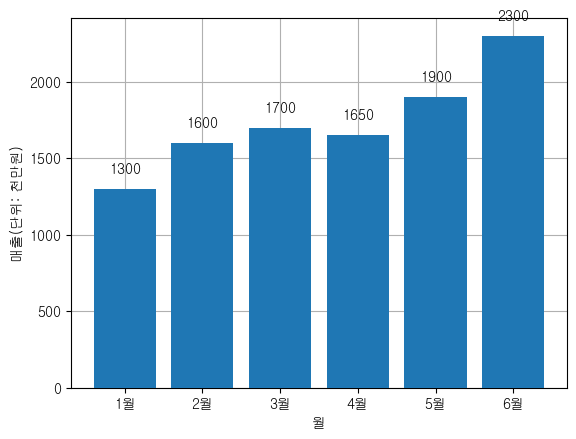

In [26]:
# 월별 매출 데이터
df = pd.DataFrame({
    'months' : ['1월', '2월', '3월', '4월', '5월', '6월'],
    'sales' : [1300, 1600, 1700, 1650, 1900, 2300]
})

# zorder : z축 깊이 설정 (값이 클수록 앞으로 나옴)
plt.bar(df['months'], df['sales'], zorder=10)

for i, val in enumerate(df['sales']):
    # x축 위치, y축 위치, 텍스트, 텍스트 정렬(위치)
    plt.text(i, val + 100, str(val), ha='center')

plt.xlabel('월')
plt.ylabel('매출(단위: 천만원)')
plt.grid(zorder=1)

plt.show()

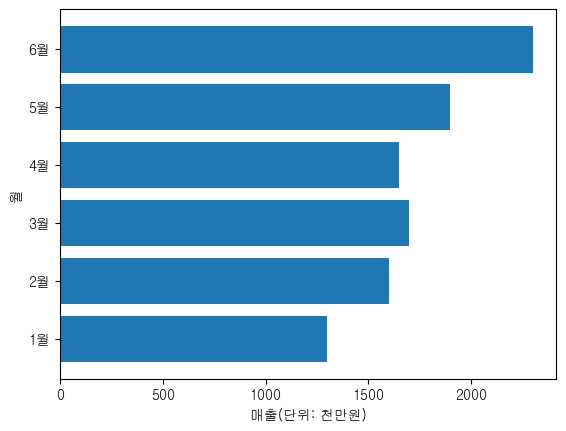

In [28]:
# 수평 막대그래프
# - x축 : 연속형
# - y축 : 범주형
plt.barh(df['months'], df['sales'])

plt.ylabel('월')
plt.xlabel('매출(단위: 천만원)')
plt.show()

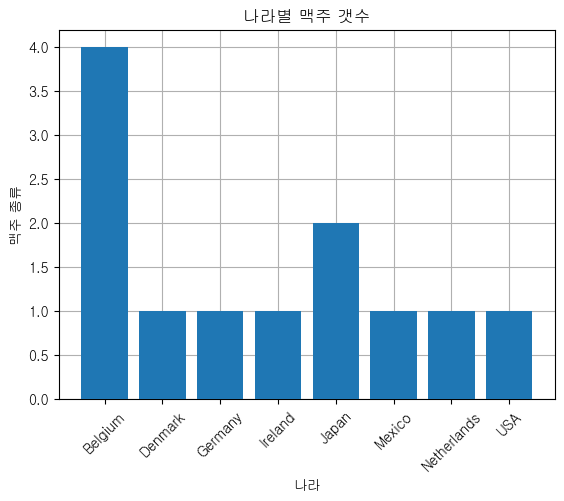

In [61]:
#나라별 맥주의 갯수 시각화
df = pd.read_csv('./data/beers.csv')
df

country_df = df.groupby('country').count()
country_df

plt.bar(country_df.index , country_df['beer_name'], zorder=10)

plt.xlabel('나라')
plt.ylabel('맥주 종류')
plt.title('나라별 맥주 갯수')
plt.xticks(rotation=45)
plt.grid(zorder=1)

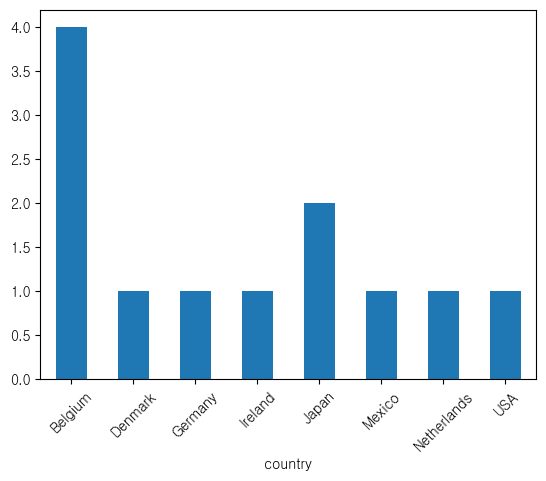

In [60]:
# 정답
beer_df = pd.read_csv('./data/beers.csv')
beer_df

beer_df_groupby = beer_df.groupby('country')['beer_name'].count()
beer_df_groupby

# bar chart
# plt.bar(beer_df_groupby.index, beer_df_groupby)

# histogram
# plt.hist(beer_df['country'], bins=beer_df['country'].unique(), rwidth=.9)

# Series/DataFrame 기준으로 plot
beer_df_groupby.plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

##### Line Plot

- 시계열 데이터에서 변화하는 값의 추이를 시각화
    - x축 : 연속형 데이터
    - y축 : 연속형 데이터

In [63]:
# 주가 추이
df = pd.DataFrame({
    'Date' : pd.date_range(start='2025-01-01', periods=14, freq='D'),
    'APPL' : np.random.randint(100, 150, 14),
    'MSFT' : np.random.randint(100, 150, 14),
})
df


,Date,APPL,MSFT
0,2025-01-01,104,142
1,2025-01-02,126,136
2,2025-01-03,126,111
3,2025-01-04,116,131
4,2025-01-05,124,148
5,2025-01-06,139,138
6,2025-01-07,134,102
7,2025-01-08,145,116
8,2025-01-09,113,143
9,2025-01-10,119,101


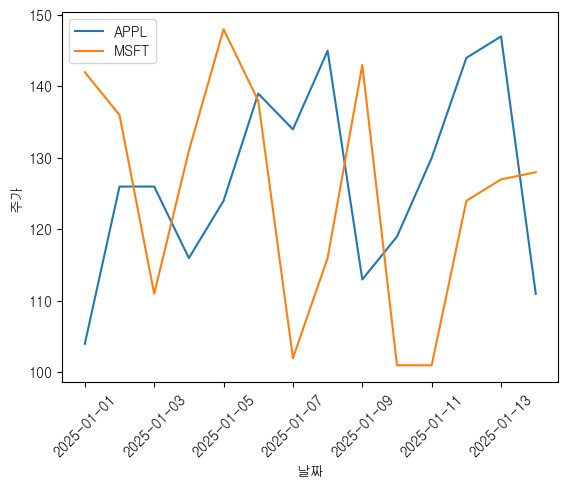

In [65]:
plt.plot(df['Date'], df['APPL'], label='APPL')
plt.plot(df['Date'], df['MSFT'], label='MSFT')

plt.xlabel('날짜')
plt.ylabel('주가')
plt.xticks(rotation=45)
plt.legend()
plt.show()

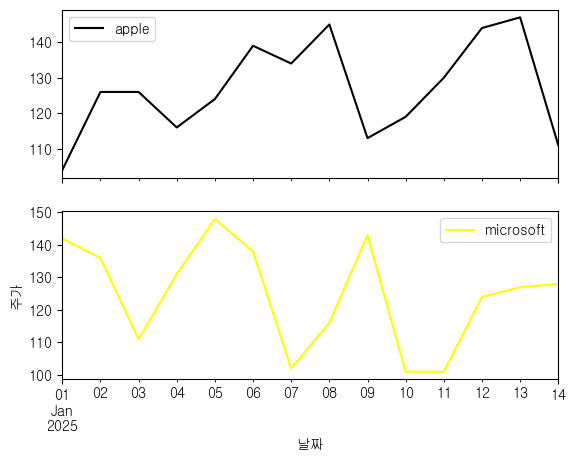

In [67]:
df.plot(
    x='Date',
    y=['APPL', 'MSFT'],
    color=['black','yellow'],
    label=['apple', 'microsoft'], # legend 설정하기 않아도 만들어짐
    subplots=True                 # subplot 형태로 그림
)

plt.xlabel('날짜')
plt.ylabel('주가')
plt.show()

array([[<Axes: xlabel='Date'>, <Axes: xlabel='Date'>]], dtype=object)

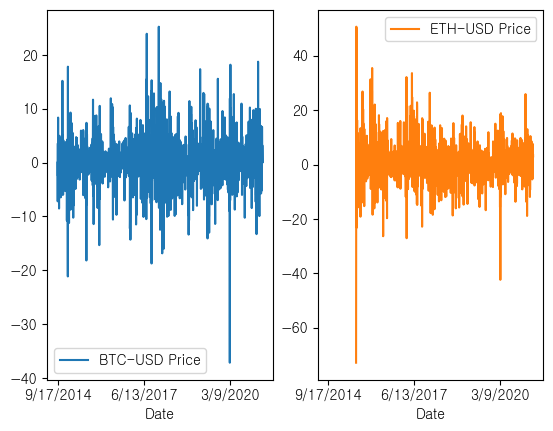

In [98]:
df = pd.read_csv('./data/crypto_daily_returns.csv')
df

df.plot(
    x='Date',
    y=['BTC',"ETH"],
    label=['BTC-USD Price', 'ETH-USD Price'],
    subplots=True,
    layout=(1, 2)
    
)

# plt.show()

Scatter Plot

- 두 축의 변수 관계를 시각화
- 두 변수 간 상관관계, 클러스터링, 이상치 파악에 도움

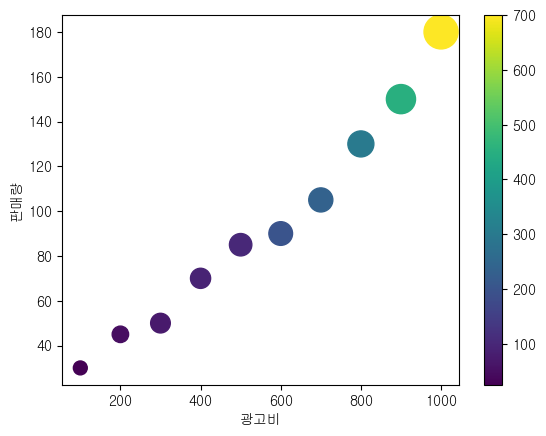

In [91]:
df = pd.DataFrame({
    'ad_budget': np.arange(100, 1001, 100), 
    'sales': [30, 45, 50, 70, 85, 90, 105, 130, 150, 180],
    'visitor': [100, 140, 200, 210, 260, 290, 300, 350, 440, 600],
    'colors': [25, 50, 70, 90, 100, 200, 235, 300, 450, 700]
})

# x축, y축, s=점의 크기, c=점의 색상(컬러 값으로 연속 데이터 표현)
plt.scatter(df['ad_budget'], df['sales'], s=df['visitor'], c=df['colors'])

plt.colorbar()

plt.xlabel('광고비')
plt.ylabel('판매량')
plt.show()

### Pie Chart

- 전체에서 각 1부분이 기여하는 비율을 시각화

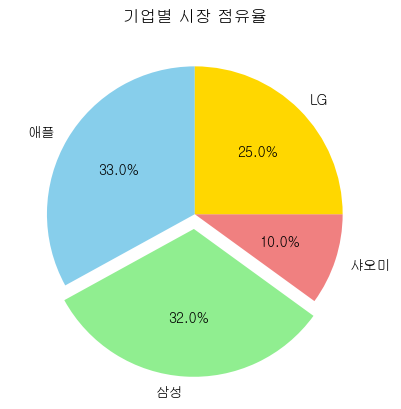

In [97]:
df = pd.DataFrame({
    'label': ['애플', '삼성', '샤오미', 'LG'],
    'market_share': [33, 32, 10, 25], 
    'sales': [1345, 234, 545, 454],
    'explode': [0, 0.1, 0, 0]
})

plt.pie(
    df['market_share'],
    labels=df['label'],
    autopct='%.1f%%',
    startangle=90,
    explode=df['explode'],
    colors=['skyblue','lightgreen','lightcoral','gold']
)

plt.title('기업별 시장 점유율')
plt.show()

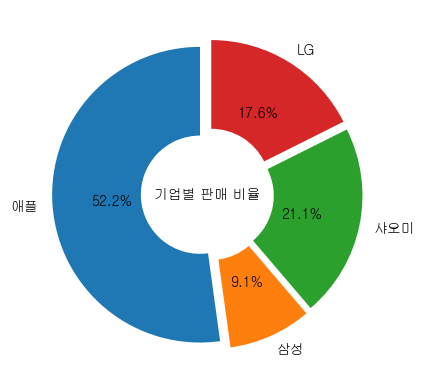

In [106]:
df = pd.DataFrame({
    'label': ['애플', '삼성', '샤오미', 'LG'],
    'market_share': [33, 32, 10, 25], 
    'sales': [1345, 234, 545, 454],
    'explode': [0, 0.1, 0, 0]
})

plt.pie(
    df['sales'],
    labels=df['label'],
    autopct='%.1f%%',
    startangle=90,
    explode=[.05, .05, .05, .05],
    wedgeprops={'width': .6}
)

plt.text(0, 0, '기업별 판매 비율', ha='center', va='center')
# plt.title('기업별 시장 점유율')

plt.show()

##### Box Plot

- 연속형데이터의 분포를 사분위수로 시각화
- 이상치 outlier를 도출하는 데에 효과적
    - x축 : 이산값(범주형) 데이터
    - y축 : 연속형 데이터

- 표현되는 값들
    - max, Q3, Q2, Q1 : 최댓값, 3분위수(75%), 2분위수(50%, 중위값), 1분위수(25%), 최소값
    - IQR (Inter-quatile Range): 사분범위

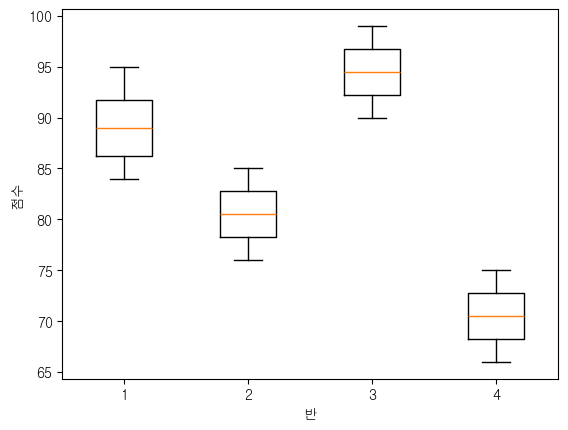

In [110]:
# 반별 시험 성적 데이터 (2차원 배열)
class_scores = [
    [85, 88, 90, 92, 93, 87, 95, 91, 84, 86],  # Class A
    [78, 82, 85, 80, 79, 84, 81, 83, 77, 76],  # Class B
    [92, 95, 96, 94, 90, 97, 93, 91, 98, 99],  # Class C
    [70, 72, 68, 75, 74, 69, 73, 71, 66, 67]   # Class D
]

plt.boxplot(class_scores)

plt.xlabel('반')
plt.ylabel('점수')
plt.show()

In [112]:
data = class_scores[0]

print('최소값:', np.min(data))
print('사분위수(Q1): ', np.percentile(data, 25))
print('사분위수(Q2): ', np.percentile(data, 50))
print('사분위수(Q3): ', np.percentile(data, 75))
print('최대값:', np.max(data))

최소값: 84
사분위수(Q1):  86.25
사분위수(Q2):  89.0
사분위수(Q3):  91.75
최대값: 95


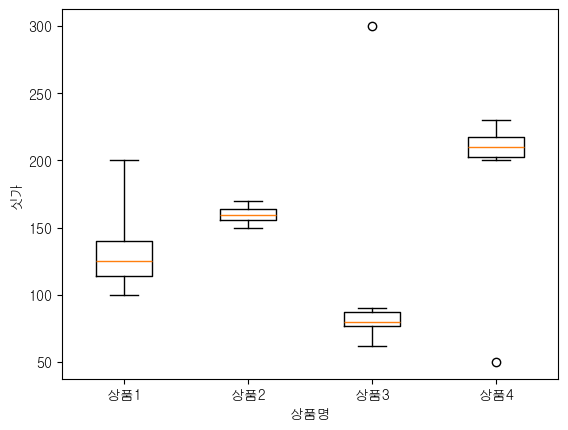

In [116]:
weird_data = [
    [100, 120, 130, 140, 150, 114, 105, 125, 200], # 이상치 200
    [150, 160, 170, 155, 165, 158],
    [80, 85, 90, 75, 62, 78, 300], # 이상치 300
    [200, 220, 210, 205, 215, 230, 50] # 이상치 50
]

# whis 기본값 : 1.5
# [참고] 수염의 길이 계산 공식 : [Q1 - whis * IQR, Q3 + whis * IQR]
# [참고] IQR = Q3 -Q1
plt.boxplot(weird_data, whis=5)
plt.xticks([1, 2, 3, 4], ['상품1', '상품2', '상품3', '상품4'])
plt.xlabel('상품명')
plt.ylabel('싯가')
plt.show()